Importing Library


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing Dataset

In [24]:
df = pd.read_csv('/Review.csv', delimiter='\t', quoting=3, encoding='latin-1')
# Display basic info
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(df.head())

Dataset shape: (1000, 1)
Columns: ['Review,Liked']
                                        Review,Liked
0                         Wow... Loved this place.,1
1                               Crust is not good.,0
2        Not tasty and the texture was just nasty.,0
3  Stopped by during the late May bank holiday of...
4  The selection on the menu was great and so wer...


Data Cleaning and Preprocessing

In [25]:
# Split the 'Review,Liked' column into 'review_text' and 'liked' by splitting on the last comma
df[['review_text', 'liked']] = df['Review,Liked'].str.rsplit(',', n=1, expand=True)

# Convert 'liked' column to numeric (assuming it's 0 or 1) with error handling
df['liked'] = pd.to_numeric(df['liked'], errors='coerce')

# Now proceed with cleaning using the correct column names

# Remove missing values (including those from numeric conversion errors)
df = df.dropna(subset=['review_text', 'liked'])

# Remove duplicates
df = df.drop_duplicates(subset=['review_text'])

# Clean text data
df['cleaned_text'] = (df['review_text']
                     .str.lower()
                     .str.replace('[^\w\s]', '', regex=True)
                     .str.strip())

# Remove empty reviews
df = df[df['cleaned_text'].str.len() > 0]

print(f"Cleaned dataset shape: {df.shape}")

Cleaned dataset shape: (996, 4)


Simple Sentiment Analysis (Keyword-based)


In [26]:
# Define sentiment keywords
positive_words = ['excellent', 'amazing', 'great', 'delicious', 'fantastic',
                  'love', 'best', 'awesome', 'perfect', 'wonderful']
negative_words = ['terrible', 'awful', 'bad', 'worst', 'horrible',
                  'disgusting', 'hate', 'poor', 'disappointing', 'pathetic']

def analyze_sentiment(text):
    text_words = text.split()
    positive_count = sum(1 for word in text_words if word in positive_words)
    negative_count = sum(1 for word in text_words if word in negative_words)

    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)

# Display sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)


Sentiment Distribution:
sentiment
neutral     739
positive    194
negative     63
Name: count, dtype: int64


Statistical Analysis with NumPy

In [27]:
# Convert liked status to numpy array for analysis
ratings = np.array(df['liked'])

# Calculate statistics
mean_rating = np.mean(ratings)
median_rating = np.median(ratings)
std_rating = np.std(ratings)
min_rating = np.min(ratings)
max_rating = np.max(ratings)

print(f"Liked Status Statistics:")
print(f"Mean: {mean_rating:.2f}")
print(f"Median: {median_rating:.2f}")
print(f"Standard Deviation: {std_rating:.2f}")
print(f"Range: {min_rating} - {max_rating}")

# Sentiment vs Liked correlation
sentiment_rating_analysis = df.groupby('sentiment')['liked'].agg(['mean', 'count'])
print("\nSentiment vs Liked Analysis:")
print(sentiment_rating_analysis)

Liked Status Statistics:
Mean: 0.50
Median: 1.00
Standard Deviation: 0.50
Range: 0 - 1

Sentiment vs Liked Analysis:
               mean  count
sentiment                 
negative   0.000000     63
neutral    0.430311    739
positive   0.932990    194


Data Visualisation with Matplotlib

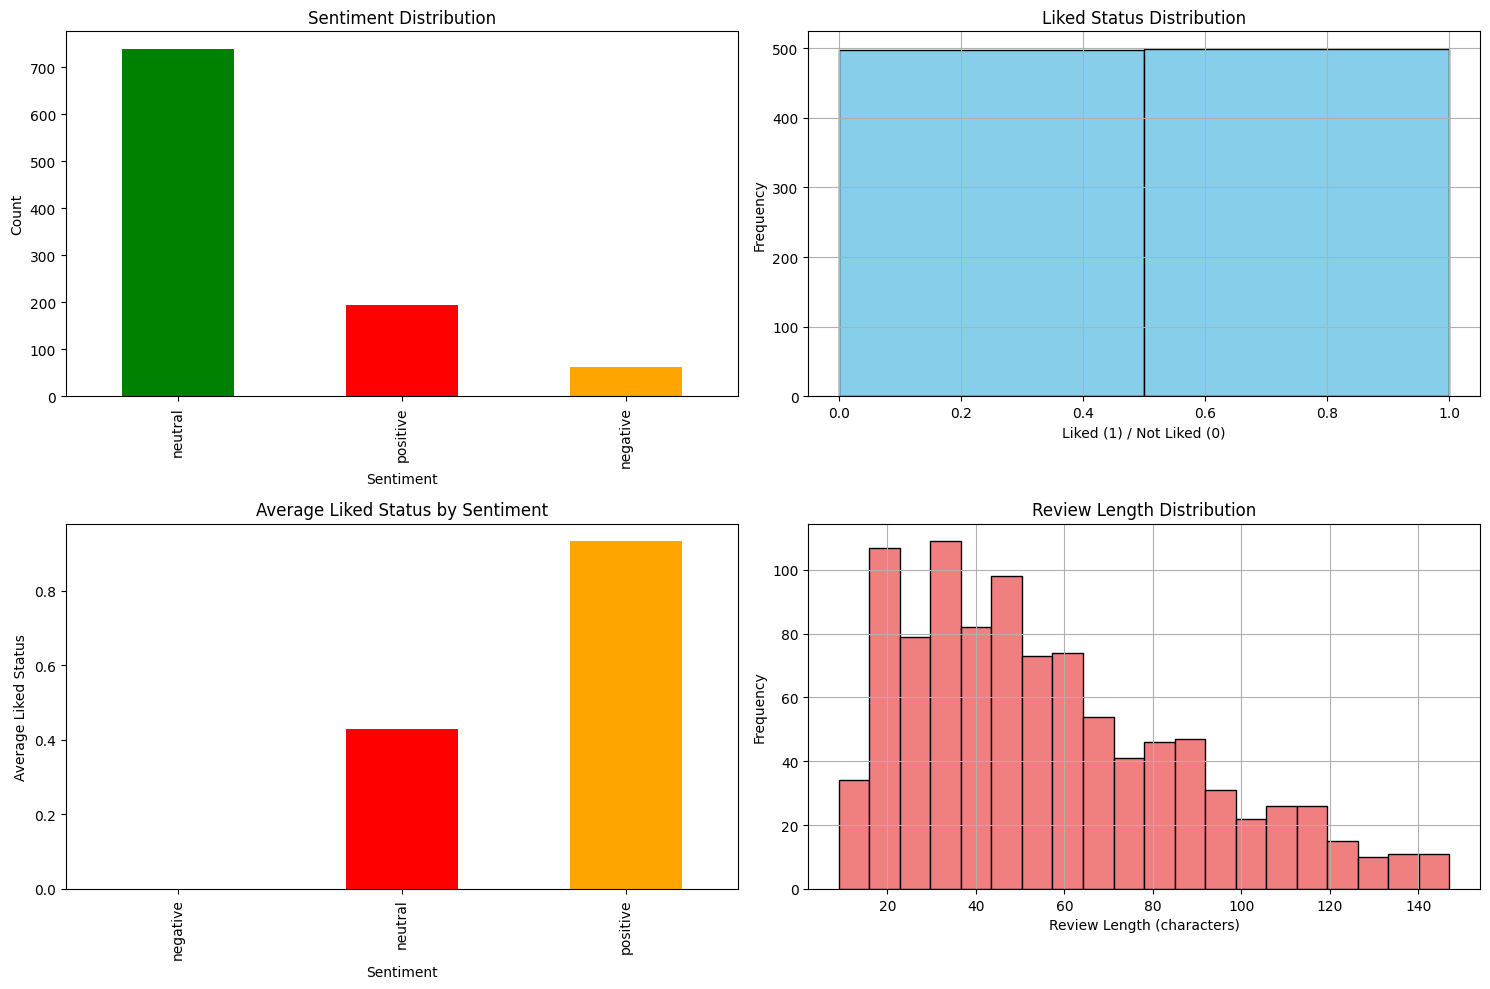

In [28]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Sentiment Distribution
sentiment_counts.plot(kind='bar', ax=axes[0,0], color=['green', 'red', 'orange'])
axes[0,0].set_title('Sentiment Distribution')
axes[0,0].set_xlabel('Sentiment')
axes[0,0].set_ylabel('Count')

# 2. Liked Status Distribution
df['liked'].hist(bins=2, ax=axes[0,1], color='skyblue', edgecolor='black')
axes[0,1].set_title('Liked Status Distribution')
axes[0,1].set_xlabel('Liked (1) / Not Liked (0)')
axes[0,1].set_ylabel('Frequency')

# 3. Average Liked Status by Sentiment
sentiment_rating_analysis['mean'].plot(kind='bar', ax=axes[1,0], color=['green', 'red', 'orange'])
axes[1,0].set_title('Average Liked Status by Sentiment')
axes[1,0].set_xlabel('Sentiment')
axes[1,0].set_ylabel('Average Liked Status')

# 4. Review Length Distribution
df['review_length'] = df['cleaned_text'].str.len()
df['review_length'].hist(bins=20, ax=axes[1,1], color='lightcoral', edgecolor='black')
axes[1,1].set_title('Review Length Distribution')
axes[1,1].set_xlabel('Review Length (characters)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Advanced Analysis and Insights

In [29]:
# Find correlation between review length and liked status
# Ensure both columns are numeric and handle potential missing values if any
correlation = np.corrcoef(df['review_length'], df['liked'])[0,1]
print(f"Correlation between review length and liked status: {correlation:.3f}")

# Restaurant-wise analysis is not possible as there is no 'restaurant_name' column.
# Monthly trend analysis is not possible as there is no 'date' column.
# The 'rating' column also does not exist; using 'liked' instead.

Correlation between review length and liked status: -0.078
